# Аналитика дата сета


Изначальный данные для обучения взял с ресурса (Набор данных дронов Lacmus (LADD))
https://www.kaggle.com/datasets/mersico/lacmus-drone-dataset-ladd-v40?resource=download



# Библиотеки

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Константы

In [2]:
FOLDER_WINTER_PATH = "./DataSet/MyData/Winter/"
FOLDER_SUMMER_PATH = "./DataSet/MyData/Summer/"

In [15]:
# Получить количество файлов в папке
def count_files_in_folder(folder_path):
    files = os.listdir(f'{folder_path}images')
    return len(files)

# функция для построения графика
def plot_image_counts(total, winter, summer):
    labels = ['Всего', 'Зимние', 'Летние']
    counts = [total, winter, summer]
    
    # Построение гистограммы
    fig, ax = plt.subplots()
    bars = ax.bar(labels, counts, color=['blue', 'cyan', 'orange'])
    
    # Добавление подписей на столбцах
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height - 0.05, f'{height}', ha='center', va='bottom', fontsize=12, color='black')

    # Настройка графика
    plt.ylabel('Number of Images')
    plt.title('Image Count: Total, Winter, Summer')
    plt.show()

In [17]:
# Пример использования
total_winter = count_files_in_folder(FOLDER_WINTER_PATH)
total_summer = count_files_in_folder(FOLDER_SUMMER_PATH)
total = total_winter + total_summer

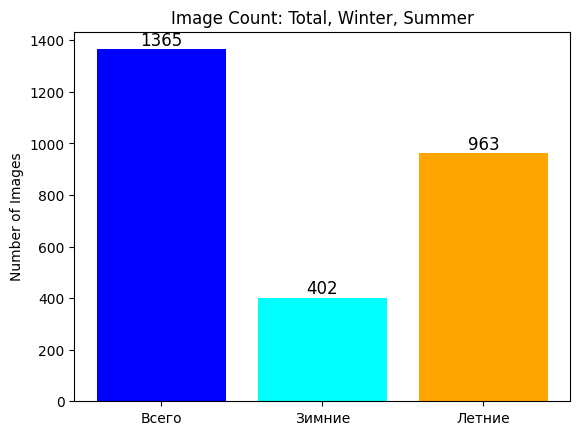

In [18]:
# Построение графика
plot_image_counts(total, total_winter, total_summer)

In [33]:
# Функция для подсчета строк в аннотационном файле
def count_lines_in_annotation_file(file_path):
    with open(file_path, 'r') as file:
        return len(file.readlines())

# Функция для обработки файлов в указанном диапазоне
def count_annotations_in_range(folder_path):
    total_annotations = 0
    files = sorted(os.listdir(f'{folder_path}label'))

    for filename in files:
        annotation_file_path = os.path.join(f'{folder_path}label', filename)
        line_count = count_lines_in_annotation_file(annotation_file_path)
        total_annotations += line_count

    return total_annotations

# функция для построения графика
def plot_image_counts_label(winter, winter_data, summer, summer_data):
    labels = ['Зимние', 'Зимние разметки', 'Летние', 'Летние разметки']
    counts = [winter, winter_data, summer, summer_data]
    
    # Построение гистограммы
    fig, ax = plt.subplots()
    bars = ax.bar(labels, counts, color=['blue', 'blue', 'orange', 'orange'])
    
    # Добавление подписей на столбцах
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height - 0.05, f'{height}', ha='center', va='bottom', fontsize=12, color='black')

    # Настройка графика
    plt.ylabel('Number of Images')
    plt.title('Image Count: Total, Winter, Summer')
    plt.show()

In [34]:
total_annotations_winter = count_annotations_in_range(FOLDER_WINTER_PATH)
total_annotations_summer = count_annotations_in_range(FOLDER_SUMMER_PATH)

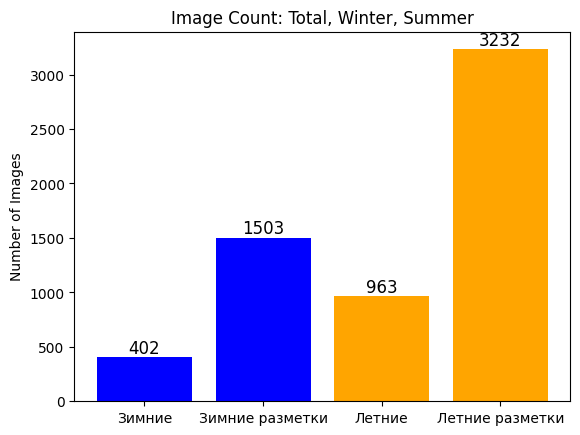

In [35]:
plot_image_counts_label(total_winter, total_annotations_winter, total_summer, total_annotations_summer )